# Project: Investigate a Dataset - Medical Appointment No Shows

Dataset:- [noshowappointments-kagglev2-may-2016.csv](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment [(Kaggle)](https://www.kaggle.com/joniarroba/noshowappointments).
<br>A number of characteristics about the patient are included in each row.
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



## Question(s) for Analysis

### Research Question 1 : Who is the most health consious patient & how many times he didnt visited as per appointment ?
### Research Question 2:  Does Gender play any role for Show / No-Show counts ?
### Research Question 3: Which Neighbourhood result in maximum no-show appointments ?
### Research Question 4: Which age group impacts in maximum no-show appointments ? Which age group is the most disciplined group with minimum no-show appointments ?
### Research Question 5: Does scheduled day & appointment day difference have any impact to the appointment NoShow event ?



## Python Module import

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




## Data loading

In [2]:
df_in= pd.read_csv("noshowappointments-kagglev2-may-2016.csv") #Loading CSV dataset to pandas dataframe
df_in.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Getting statistical data about data
df_in.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# Data size examine
df_in.shape

(110527, 14)

In [5]:
#Columns present
df_in.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
# Checking for Null values & column value types
df_in.info()
#No Null values found 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#Duplicate check
df_in.duplicated().sum()

0

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we will check for cleanliness, and then trim and clean your dataset for analysis. 



### Data Cleaning


> ## Histogram graph to check for data skeyness

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


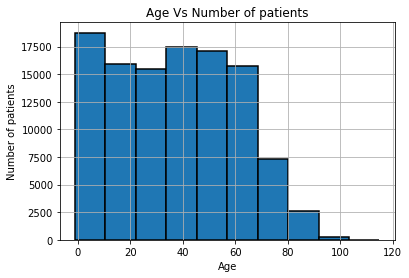

In [18]:
axA = df_in.Age.hist(edgecolor='black', linewidth=1.5) #Age histogram shows Age value as 0 & -1 which is not possible. This can be due to incorrect data-entry
axA.set_xlabel('Age')
axA.set_ylabel('Number of patients')
axA.set_title('Age Vs Number of patients')
pd.DataFrame(df_in['Age'].describe())

In [14]:
NegAgeP = np.round((len(df_in[(df_in.Age <1)])/len(df_in))*100,3)
NegAge = len(df_in[(df_in.Age <1)])
print("Percentage of data with wrong age value(Non positive values):{} % ,Wrong Age data Count:{}".format(NegAgeP,NegAge))
# Percentage of data with wrong age value(Non positive values):3.203 % ,Wrong Age data Count:3540
# As the wrong count data percentage is less, it can removed to have the clean data

Percentage of data with wrong age value(Non positive values):3.203 % ,Wrong Age data Count:3540


In [15]:
#Checking No-show unique category
df_in['No-show'].unique()

array(['No', 'Yes'], dtype=object)

## Data preparation

In [16]:
#Renaming columns & changing PatientId column type to int  
df_in.rename({'No-show':'NoShow'},axis=1,inplace=True)
df_in['PatientId'] = df_in['PatientId'].apply(lambda x: int(x))
df_in['NoShow'] = df_in['NoShow'].apply(lambda x: str(x))

In [20]:
df_in

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


array(['04', '05', '06'], dtype=object)

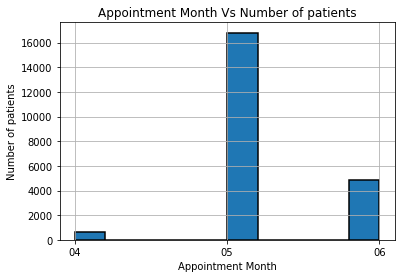

In [33]:
df_in['App_month'] = df_in['AppointmentDay'].apply(lambda x: x.split("-")[1])
temp_ = df_in[df_in['NoShow']=='Yes']
axAD = temp_.App_month.hist(edgecolor='black', linewidth=1.5)
axAD.set_xlabel('Appointment Month')
axAD.set_ylabel('Number of patients')
axAD.set_title('Appointment Month Vs Number of patients')
pd.DataFrame(temp_['App_month'].describe())
df_in['App_month'].unique()


array(['04', '05', '06'], dtype=object)

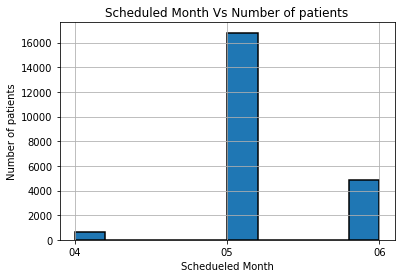

In [36]:
df_in['Sch_month'] = df_in['ScheduledDay'].apply(lambda x: x.split("-")[1])
axSD = temp_.App_month.hist(edgecolor='black', linewidth=1.5)
axSD.set_xlabel('Schedueled Month')
axSD.set_ylabel('Number of patients')
axSD.set_title('Scheduled Month Vs Number of patients')
pd.DataFrame(temp_['Sch_month'].describe())
df_in['App_month'].unique()

## Scheduled month & Appointment month shows that the No-show appointment is highest for the month of May (05)

In [35]:
# Dropping rows where age is non positive
df_in = df_in.drop(df_in[df_in.Age < 1].index)
len(df_in[df_in.Age < 1]) #Check for drop

0

In [39]:
df_in.corr() #Checking variable correleation
# Shows Age Vs hipertension a positive correlation 0.50

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004189,-0.002970,-0.002172,-0.006155,0.001873,0.011361,-0.007989,-0.008468
AppointmentID,0.004189,1.000000,-0.023401,0.022379,0.012092,0.022505,0.033159,0.013993,-0.254682
Age,-0.002970,-0.023401,1.000000,-0.112699,0.502091,0.290631,0.090391,0.074073,0.005251
Scholarship,-0.002172,0.022379,-0.112699,1.000000,-0.024530,-0.027622,0.033527,-0.009890,-0.000010
Hipertension,-0.006155,0.012092,0.502091,-0.024530,1.000000,0.430827,0.085459,0.078209,-0.008805
Diabetes,0.001873,0.022505,0.290631,-0.027622,0.430827,1.000000,0.016874,0.056377,-0.016136
Alcoholism,0.011361,0.033159,0.090391,0.033527,0.085459,0.016874,1.000000,0.003855,-0.027403
Handcap,-0.007989,0.013993,0.074073,-0.009890,0.078209,0.056377,0.003855,1.000000,-0.025155
SMS_received,-0.008468,-0.254682,0.005251,-0.000010,-0.008805,-0.016136,-0.027403,-0.025155,1.000000


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 : Who is the most health consious patient & how many times he didnt visited as per appointment?

In [40]:
# Use this, and more code cells, to explore your data. Don't forget to add
# 
df_group = df_in.groupby(['PatientId']).NoShow.agg([('Join', ','.join)])  # aggregate separated with commas
df_group['NoShow'] = df_group.Join.map(lambda x: [i.strip() for i in x.split(",")]) #convert typw
df_group['Count_yes'] = df_group['Join'].apply(lambda x : x.count('Yes'))# Get count
df_group['Count'] = df_group.NoShow.apply(len) # total number of visits
df_group['Percentage_NoShow'] = (df_group['Count_yes'] /  df_group['Count'])*100
is_max = df_group['Count'] ==max(df_group['Count'])  
df_health_consious = df_group[is_max]   
df_health_consious.reset_index(level=0, inplace=True)
df_join =pd.merge(df_in,df_health_consious,on=['PatientId'])   # inner join

print("Patient with maximum appointments>>\nPatient Id:{} ,Gender:{} ,Age:{} ,Neighbourhood:{} ,Count of appointment:{} ,Percentage of no-show:{}%".format(df_join['PatientId'][0],df_join['Gender'][0],df_join['Age'][0],df_join['Neighbourhood'][0],df_join['Count'][0],np.round(df_join['Percentage_NoShow'][0],3)))
print("This patient is health consious as:\n",df_join[['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap']].drop_duplicates())
print("Percentage show as per appointment: ",)

Patient with maximum appointments>>
Patient Id:822145925426128 ,Gender:M ,Age:38 ,Neighbourhood:REDENÇÃO ,Count of appointment:88 ,Percentage of no-show:1.136%
This patient is health consious as:
    Scholarship  Hipertension  Diabetes  Alcoholism  Handcap
0            0             0         0           0        0
Percentage show as per appointment: 


### Finding:- Patient Id:822145925426128 ,Gender:M ,Age:38 ,Neighbourhood:REDENÇÃO ,Count of appointment:88 ,Percentage of no-show:1.136%
This patient is most health consious as at age of 38 he is doing repeated checkups with less no-show count & no diseases like hipertension,diabetes found for him.

### Research Question 2:  Does Gender play any role for Show / No-Show counts?

C:\Users\I0001327\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


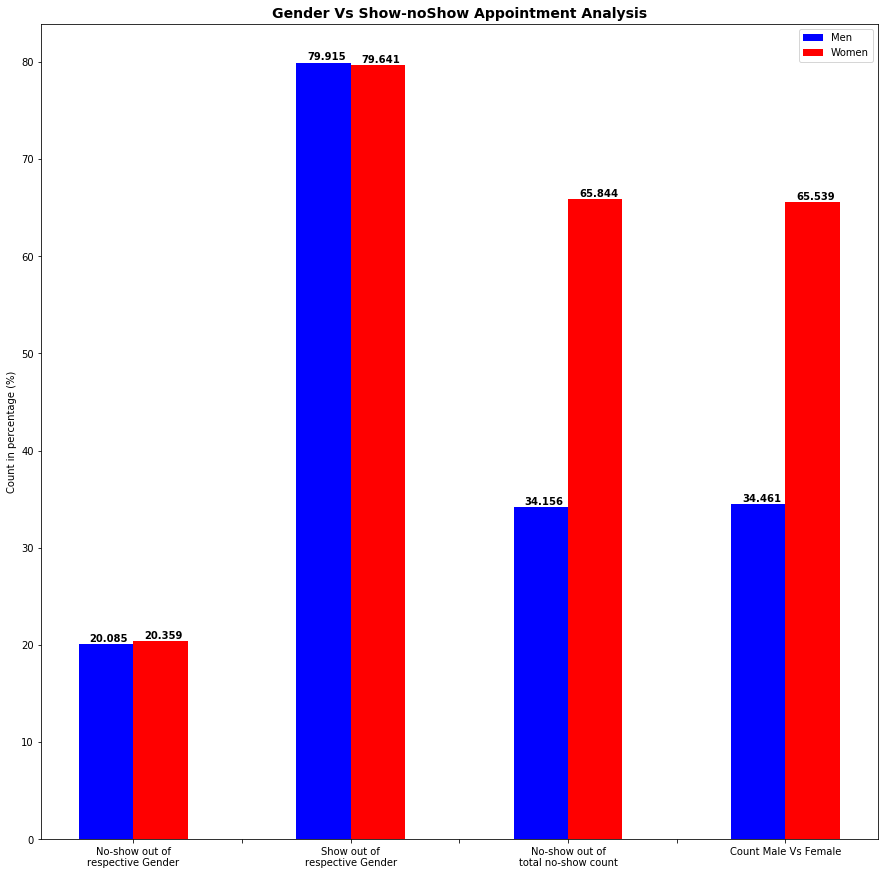

In [41]:
# Continue to explore the data to address your additional research
isM = df_in.Gender=='M'  #Gender male
isNs = df_in.NoShow=='Yes'  #All No-show-Yes
isS = df_in.NoShow=='No' #All Show-up(No-show-No)
isF = df_in.Gender=='F'  #Gender Female
isM_Ns = (df_in.Gender=='M') & (df_in.NoShow =='Yes')  #Male no show
isF_Ns = (df_in.Gender=='F') & (df_in.NoShow =='Yes')  #Female no show
isM_S = (df_in.Gender=='M') & (df_in.NoShow =='No')  #Male show-up
isF_S = (df_in.Gender=='F') & (df_in.NoShow =='No')  #Female show-up

df_Ns=df_in[isNs]   #No-show-Yea
df_S=df_in[isS]   #No-show - No
df_M_Ns=df_in[isM_Ns]   #No-show-Male
df_F_Ns=df_in[isF_Ns]   #No-show-Female
df_M_S=df_in[isM_S]   #Show - Male
df_F_S =df_in[isF_S]   #Show - Female

#Perctage Wise Plot between Male & female  
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figheight(15)
fig.set_figwidth(15)
width=1
rect1 = ax.bar(1,(len(df_M_Ns)/len(df_in[isM]))*100,width,color='b',label='Count',align='edge') # Male NoShow perc
rect2 = ax.bar(2,(len(df_F_Ns)/len(df_in[isF]))*100,width,color='r',label='Count',align='edge') #Female NoShow perc 
rect3 = ax.bar(5,(len(df_M_S)/len(df_in[isM]))*100,width,color='b',label='Count',align='edge') #Male Show perc
rect4 = ax.bar(6,(len(df_F_S)/len(df_in[isF]))*100,width,color='r',label='Count',align='edge') #Female Show perc
rect5 = ax.bar(9,(len(df_M_Ns)/len(df_in[isNs]))*100,width,color='b',label='Count',align='edge') #Male No-Show out of total no-show perc
rect6 = ax.bar(10,(len(df_F_Ns)/len(df_in[isNs]))*100,width,color='r',label='Count',align='edge') #Female No-Show out of total no-show perc
rect7 = ax.bar(13,(len(df_in[isM])/len(df_in))*100,width,color='b',label='Count',align='edge') #Male count-perc
rect8 = ax.bar(14,(len(df_in[isF])/len(df_in))*100,width,color='r',label='Count',align='edge') #Female count-perc
a =[np.round((len(df_M_Ns)/len(df_in[isM]))*100,3) ,np.round((len(df_F_Ns)/len(df_in[isF]))*100,3), np.round((len(df_M_S)/len(df_in[isM]))*100,3),np.round( (len(df_F_S)/len(df_in[isF]))*100,3),np.round((len(df_M_Ns)/len(df_in[isNs]))*100,3),np.round((len(df_F_Ns)/len(df_in[isNs]))*100,3),np.round((len(df_in[isM])/len(df_in))*100,3),np.round((len(df_in[isF])/len(df_in))*100,3)]

ax.text(1.2 , a[0]+0.3 , str(a[0]),  color = 'black', fontweight = 'bold')
ax.text(2.2 , a[1]+0.3 , str(a[1]),  color = 'black', fontweight = 'bold')
ax.text(5.2 , a[2]+0.3 , str(a[2]),  color = 'black', fontweight = 'bold')
ax.text(6.2 , a[3]+0.3 , str(a[3]),  color = 'black', fontweight = 'bold')
ax.text(9.2 , a[4]+0.3 , str(a[4]),  color = 'black', fontweight = 'bold')
ax.text(10.2 , a[5]+0.3 , str(a[5]),  color = 'black', fontweight = 'bold')
ax.text(13.2 , a[6]+0.3 , str(a[6]),  color = 'black', fontweight = 'bold')
ax.text(14.2 , a[7]+0.3 , str(a[7]),  color = 'black', fontweight = 'bold')


ax.legend((rect1, rect2,rect3,rect4), ('Men', 'Women'))
ax.set_xticklabels(( '','No-show out of\nrespective Gender','', 'Show out of\nrespective Gender','','No-show out of\ntotal no-show count','','Count Male Vs Female'))
ax.set_ylabel('Count in percentage (%)')
ax.set_title('Gender Vs Show-noShow Appointment Analysis', fontsize = 14, fontweight ='bold')
fig.show();
    


### Finding:- Gender doesnt play major role as the bar graph shows above, but percentage wise it shows for No-show count is more for females considering the total count for the respective gender instead of total dataframe count to avoid Simpson Paradox 
Females are contributing more towards the no-show count, hence showing high bar in the 6th bar. But 1st bar shows that similar percentage of females compared to male are not showing up for appointment.

### Research Question 3: Which Neighbourhood result in maximum no-show appointments?

In [53]:
df =df_in[['Neighbourhood','NoShow']]
df =df[df['NoShow'] =='Yes']  # Filter for no-show
test = df['Neighbourhood'].value_counts(ascending=False) # creating number of unique value counts
pd.DataFrame(test).describe()



,Neighbourhood
count,80.000000
mean,271.000000
std,271.361546
min,1.000000
25%,73.750000
50%,181.000000
75%,419.750000
max,1432.000000


## Histogram plot to show Neighbourhood Vs Number of No-show patients for top 75% No-show patient counts

Text(0.5, 1.0, 'Neighbourhood Vs Number of No-show patients for top 75% No-show counts')

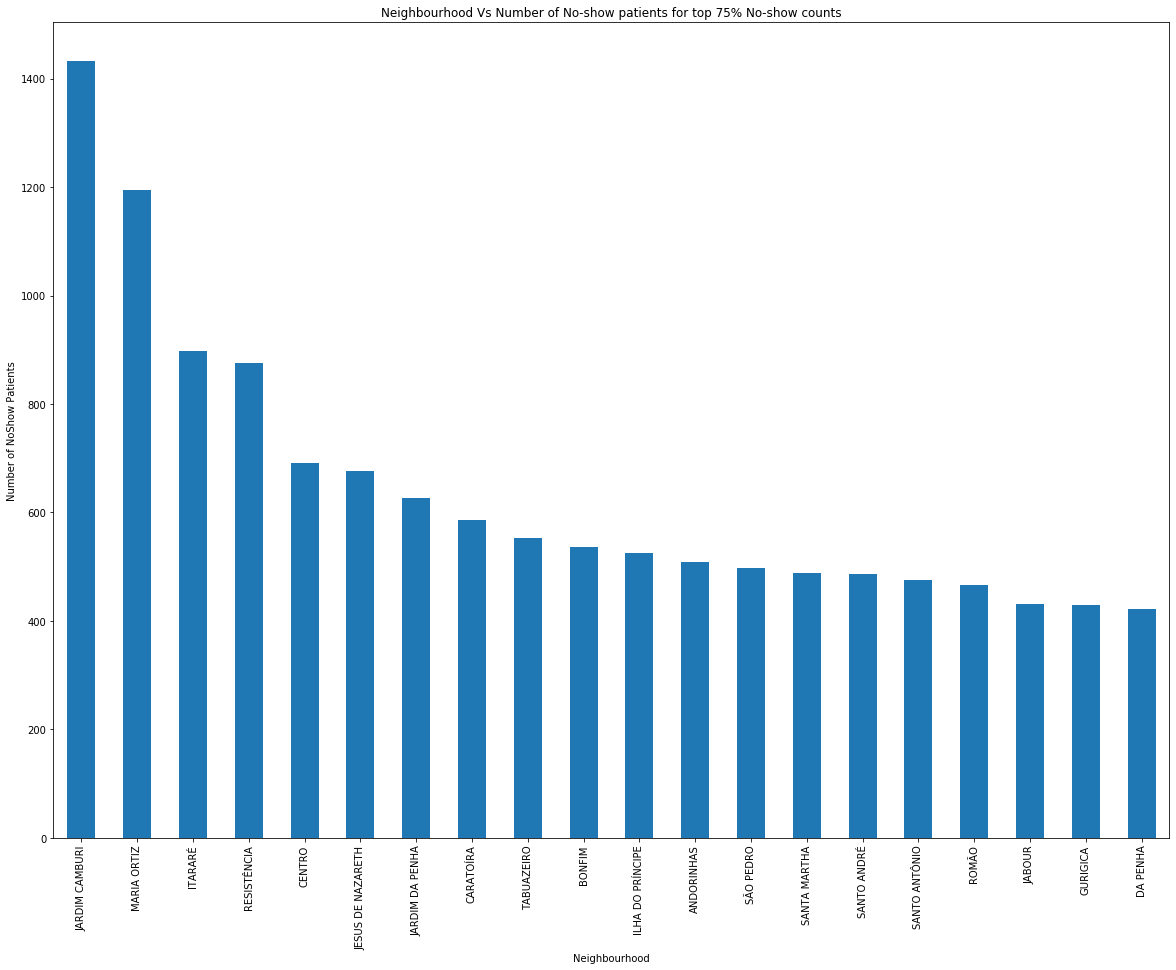

In [54]:
test1 = test[test > 419.75] #Creating custom filter to see higher NoShow counts with the respective neighbourhoods
axN =test1.plot.bar(x='Index',y='Neighbourhood',figsize=(20,15));
axN.set_xlabel('Neighbourhood')
axN.set_ylabel('Number of NoShow Patients')
axN.set_title('Neighbourhood Vs Number of No-show patients for top 75% No-show counts')


In [55]:
print("Top 3 places with maximum no-show appointments are:\nPLACE-Count\n1){}-{}\n2){}-{}\n3){}-{}".format(test.index[0],test[0],test.index[1],test[1],test.index[2],test[2]))

Top 3 places with maximum no-show appointments are:
PLACE-Count
1)JARDIM CAMBURI-1432
2)MARIA ORTIZ-1194
3)ITARARÉ-898


In [56]:
length = len(test)
print("Top 3 places with least no-show appointments are:\nPLACE-Count\n1){}-{}\n2){}-{}\n3){}-{}".format(test.index[length-1],test[length-1],test.index[length-2],test[length-2],test.index[length-3],test[length-3]))

Top 3 places with least no-show appointments are:
PLACE-Count
1)AEROPORTO-1
2)ILHA DO FRADE-2
3)ILHAS OCEÂNICAS DE TRINDADE-2


##  Looking deeply into the data for the Neighbourhood : 'JARDIM CAMBURI' which shows max NoShow appointment records


In [57]:
temp = df_in[df_in.Neighbourhood =='JARDIM CAMBURI']
temp = temp[temp.NoShow =='Yes']
temp

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,App_month,Sch_month
446,24494241866,5562707,F,2016-04-08T14:13:23Z,2016-04-29T00:00:00Z,60,JARDIM CAMBURI,0,0,0,0,0,1,Yes,04,04
448,62818436793537,5564809,M,2016-04-11T08:06:06Z,2016-04-29T00:00:00Z,12,JARDIM CAMBURI,0,0,0,0,0,1,Yes,04,04
575,299778815147872,5609550,M,2016-04-20T16:09:23Z,2016-04-29T00:00:00Z,23,JARDIM CAMBURI,0,0,0,0,0,1,Yes,04,04
610,3385223672972,5634237,M,2016-04-28T10:37:09Z,2016-04-29T00:00:00Z,48,JARDIM CAMBURI,0,0,0,0,0,0,Yes,04,04
1960,975822937729569,5628416,M,2016-04-27T10:59:08Z,2016-04-29T00:00:00Z,17,JARDIM CAMBURI,0,0,0,0,0,0,Yes,04,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109838,5289177614313,5769488,M,2016-06-03T08:53:01Z,2016-06-07T00:00:00Z,68,JARDIM CAMBURI,0,0,0,0,0,1,Yes,06,06
109992,496891744474147,5765854,F,2016-06-02T13:51:52Z,2016-06-06T00:00:00Z,63,JARDIM CAMBURI,0,0,0,0,0,1,Yes,06,06
110095,415876789177954,5734648,F,2016-05-24T15:58:41Z,2016-06-01T00:00:00Z,10,JARDIM CAMBURI,0,0,0,0,0,1,Yes,06,05
110194,62561566671256,5756776,F,2016-06-01T08:40:09Z,2016-06-03T00:00:00Z,52,JARDIM CAMBURI,0,0,0,0,0,0,Yes,06,06


## Pie plot to show Gender wise distribution for No-show patients count for the Neighbourhood :JARDIM CAMBURI (Neighbourhood with highest No-show count)

Text(0.5, 1.0, 'Pie plot to show Gender wise distribution for No-show patients count for the Neighbourhood :JARDIM CAMBURI')

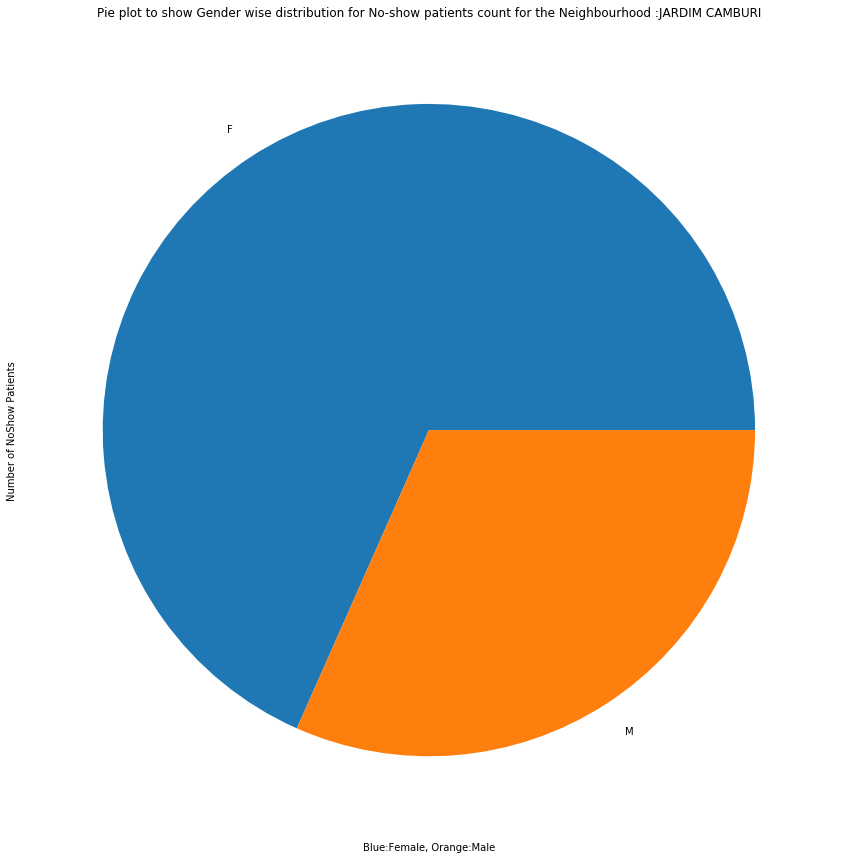

In [69]:

plot = temp.Gender.value_counts().plot(kind='pie', figsize=(20, 15))
plot.set_xlabel('Blue:Female, Orange:Male')
plot.set_ylabel('Number of NoShow Patients')
plot.set_title('Pie plot to show Gender wise distribution for No-show patients count for the Neighbourhood :JARDIM CAMBURI')

## Bar graph to show Age-group wise distribution for No-show patients count  for Neighbourhood 'JARDIM CAMBURI'

Text(0.5, 1.0, 'Bar graph to show Age-group wise distribution for No-show patients count in JARDIM CAMBURI')

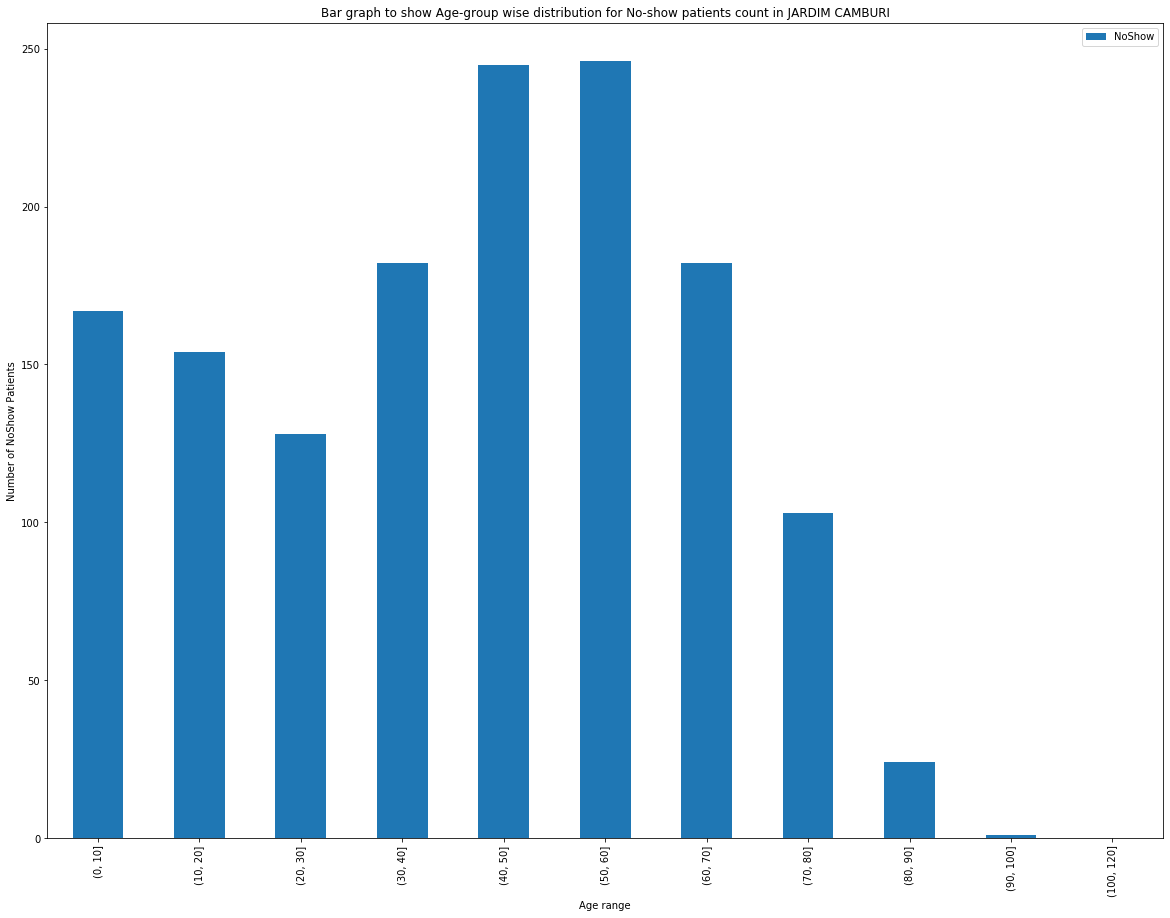

In [110]:
ranges = [0,10,20,30,40,50,60,70,80,90,100,120] #Age wise distribution
df_age_temp = temp.groupby(pd.cut(temp.Age, ranges)).count()
df_age_temp = df_age_temp[['NoShow']]
total=sum(df_age_temp.NoShow)
df_age_temp['PercentageNoShow'] = (df_age_temp['NoShow']/total)*100
df_age_temp.reset_index(level=0, inplace=True)

# Age wise distribution for the Region ""
Age_plot =df_age_temp.plot.bar(x='Age',y='NoShow',figsize=(20,15));
Age_plot.set_xlabel('Age range')
Age_plot.set_ylabel('Number of NoShow Patients')
Age_plot.set_title('Bar graph to show Age-group wise distribution for No-show patients count in JARDIM CAMBURI')

### Findings:- Plot showing Age Vs No-show count for Neighbourhood 'JARDIM CAMBURI' with maximum NoShow appointment records
Age group 40-60 shows major No-show count for Neighbourhood 'JARDIM CAMBURI'

### Research Question 4: Which age group impacts in maximum no-show appointments? Which age group is the most disciplined group with minimum no-show appointments?

C:\Users\I0001327\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Bar graph to show Age-group wise distribution for No-show patients count across entire data')

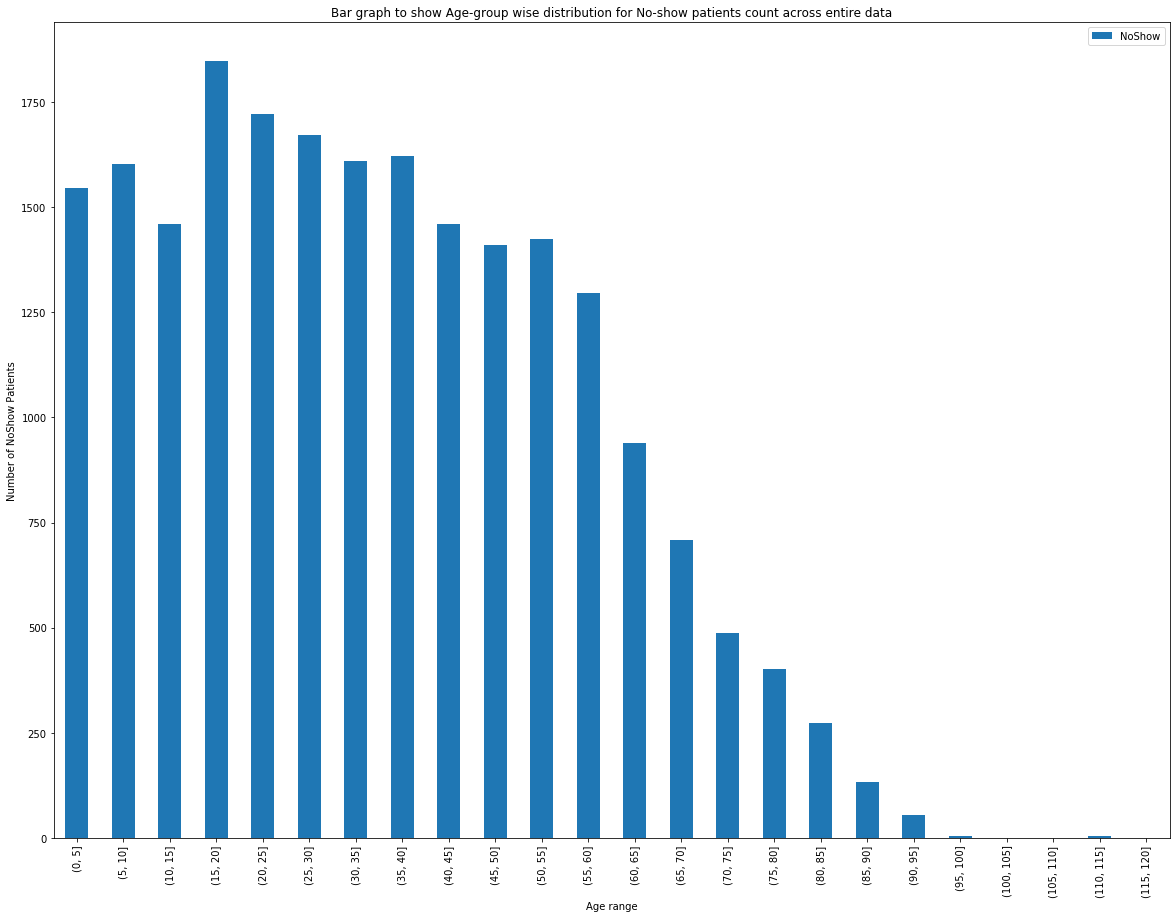

In [75]:
ranges1 = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120] #Age wise distribution
temp1 = df_in[df_in.NoShow == 'Yes'] #Filter for now show
temp1 = temp1.groupby(pd.cut(temp1.Age, ranges1)).count()
df_age_temp1 = temp1[['NoShow']]
total1=sum(df_age_temp1.NoShow)
df_age_temp1['Percentage-NoShow'] = (df_age_temp1['NoShow']/total1)*100
df_age_temp1.reset_index(level=0, inplace=True)

# Age wise distribution for the entire dataset
Age_plot1 =df_age_temp1.plot.bar(x='Age',y='NoShow',figsize=(20,15));
Age_plot1.set_xlabel('Age range')
Age_plot1.set_ylabel('Number of NoShow Patients')
Age_plot1.set_title('Bar graph to show Age-group wise distribution for No-show patients count across entire data')

 ## Plot showing Age Vs No-show count for all Neighbourhood with NoShow appointment records

## Finding:- Age group 15-20 has the most count for NoShow Appointments

In [23]:
df_age_temp1

,Age,NoShow,Percentage-NoShow
0,"(0, 5]",1546,7.130996
1,"(5, 10]",1603,7.393911
2,"(10, 15]",1460,6.734317
3,"(15, 20]",1848,8.523985
4,"(20, 25]",1722,7.942804
5,"(25, 30]",1672,7.712177
6,"(30, 35]",1610,7.426199
7,"(35, 40]",1622,7.481550
8,"(40, 45]",1460,6.734317
9,"(45, 50]",1410,6.503690


C:\Users\I0001327\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\I0001327\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, 'Bar graph to show Age-group wise distribution for health-consious patients count across entire data')

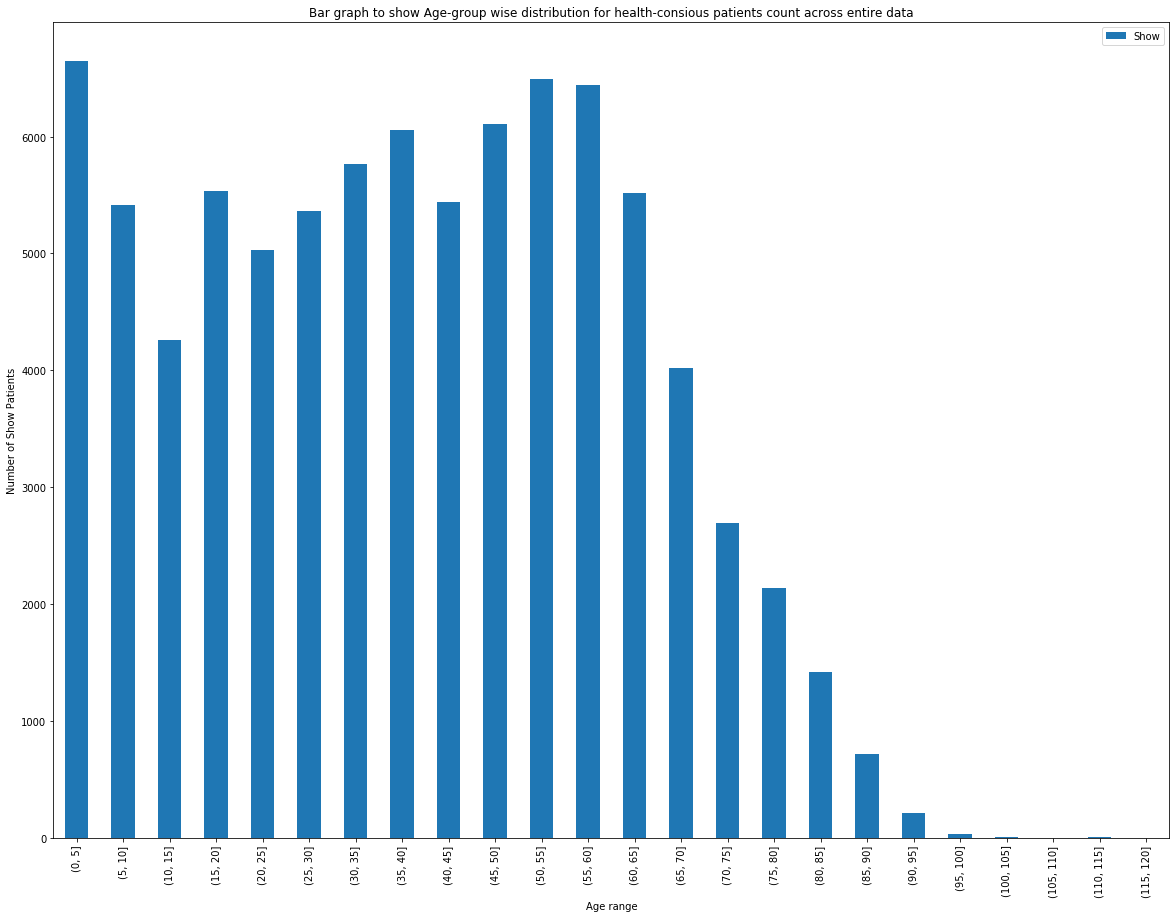

In [76]:
temp2 = df_in[df_in.NoShow == 'No'] #Filter for now show
temp2 = temp2.groupby(pd.cut(temp2.Age, ranges1)).count()
df_age_temp2 = temp2[['NoShow']]
total2=sum(df_age_temp2.NoShow)
df_age_temp2 = temp2[['NoShow']]

df_age_temp2['Percentage-Show'] = (df_age_temp2['NoShow']/total2)*100
df_age_temp2.reset_index(level=0, inplace=True)
df_age_temp2.rename({'NoShow':'Show'},axis=1,inplace=True)

# Age wise distribution for the entire dataset
Age_plot2  = df_age_temp2.plot.bar(x='Age',y='Show',figsize=(20,15));
Age_plot2.set_xlabel('Age range')
Age_plot2.set_ylabel('Number of Show Patients')
Age_plot2.set_title('Bar graph to show Age-group wise distribution for health-consious patients count across entire data')

## Age group 0-5, 50-60 are the most disciplined group who miss their appointments the least & have major appointment count

In [25]:
df_age_temp2

,Age,Show,Percentage-Show
0,"(0, 5]",6646,7.790685
1,"(5, 10]",5415,6.347662
2,"(10, 15]",4259,4.992556
3,"(15, 20]",5532,6.484814
4,"(20, 25]",5029,5.895179
5,"(25, 30]",5360,6.283189
6,"(30, 35]",5762,6.754428
7,"(35, 40]",6058,7.101410
8,"(40, 45]",5442,6.379312
9,"(45, 50]",6108,7.160022


## Research Question 5: Does scheduled day & appointment day difference have any impact to the appointment NoShow event?

In [82]:
# Calculating date difference between Appointment Day & Scheduled day based on the delimiter "T"
df_in['App_date'] = df_in['AppointmentDay'].apply(lambda x: x.split("T")[0])
df_in['Sch_date'] = df_in['ScheduledDay'].apply(lambda x: x.split("T")[0])
df_in['App_date']= df_in['App_date'].apply(lambda x: pd.to_datetime(x))
df_in['Sch_date']= df_in['Sch_date'].apply(lambda x: pd.to_datetime(x))
df_in['Date_dif']=df_in.App_date - df_in.Sch_date

In [83]:
df_in['Date_dif']= df_in.Date_dif.apply(lambda x:x.days)
df_in['Date_dif']= df_in.Date_dif.apply(lambda x:int(x))

print(type(df_in.Date_dif[0]))

<class 'numpy.int64'>


Text(0.5, 1.0, 'Bar graph to show Day difference between Scheduled date & Appointment date relationship with No-Showe count')

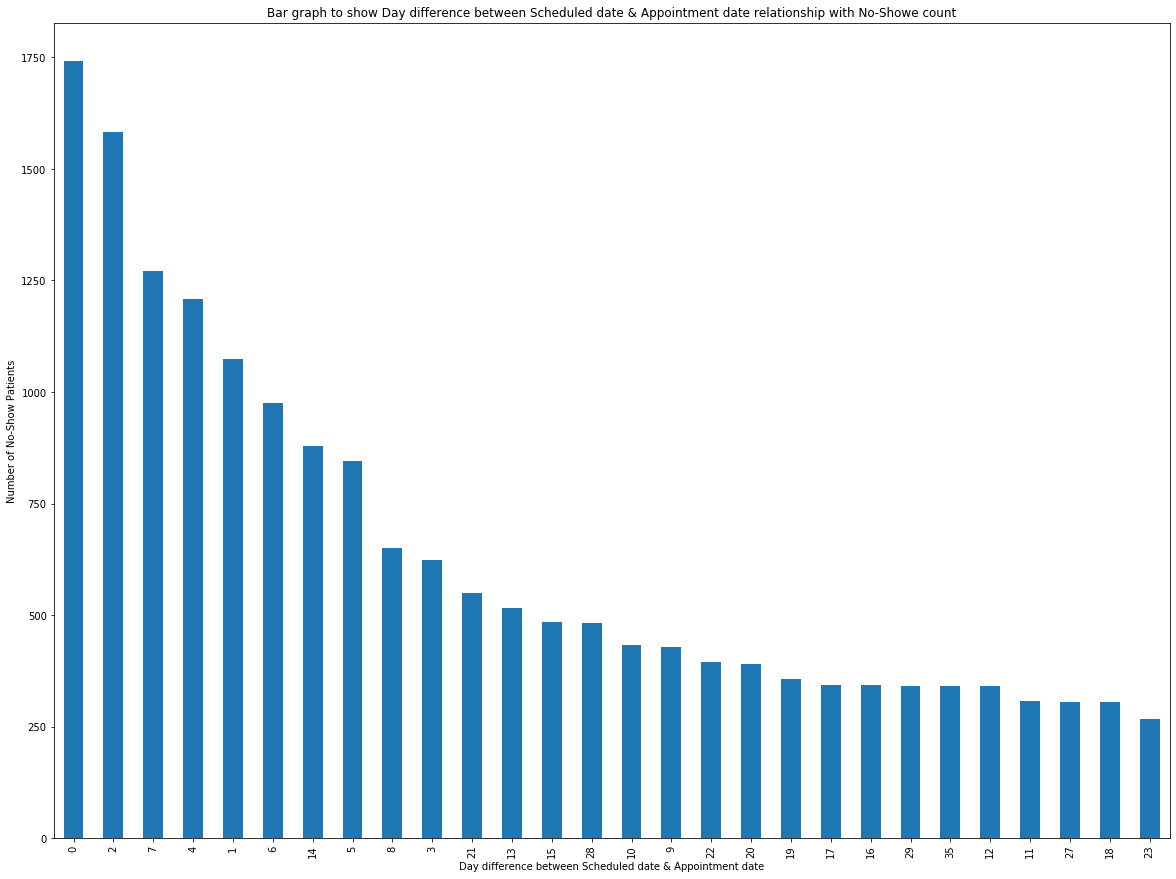

In [103]:
test = df_in[['Date_dif','NoShow']]
test = test.drop(test[test.Date_dif<0].index)
test = test[test.NoShow =='Yes']
#test.plot.bar(x='Date_dif',y='NoShow',figsize=(20,15));
test1 =test['Date_dif'].value_counts()
test2 = test1[test1 >=266.5] # 75%
Age_plot3 = test2.plot.bar(x='Index',y='NoShow',figsize=(20,15));
Age_plot3.set_xlabel('Day difference between Scheduled date & Appointment date')
Age_plot3.set_ylabel('Number of No-Show Patients')
Age_plot3.set_title('Bar graph to show Day difference between Scheduled date & Appointment date relationship with No-Showe count')
# 0 day difference represents same Day appointment & scheduled date

## Same day for scheduled date & appointment day represents maximum No-Show Patient Count

In [101]:
pd.DataFrame(test1).describe() #Count of 266.5 shows 75% of No-Show count data


,Date_dif
count,110.000000
mean,197.045455
std,333.055231
min,1.000000
25%,9.500000
50%,35.000000
75%,266.500000
max,1741.000000


Date difference- NoShow statistics

### Plot showing Date difference between Scheduled date & appointment date Vs No-show
X axis:- Day difference
Y axis:- Count of No-show
* Max NoShow appointment events observed for same day scheduled date & appointment date

In [106]:
same_day_noShow_perc = (len(df_in[df_in['NoShow']=='Yes']) /len(df_in[df_in['Date_dif']==0]))*100
print("Same day for scheduled date & appointment day represents maximum No-Show Patient Count Percentage:")
print(same_day_noShow_perc,"%") #Same day noShow event out of total Same day events 

Same day for scheduled date & appointment day represents maximum No-Show Patient Count Percentage:
58.351725251655274 %


## Same day for scheduled date & appointment day represents maximum No-Show Patient Count Percentage: 58.3517 %

In [107]:
perc_2wk = np.round((len(test[test.Date_dif <15])/len(test))*100,3)
perc_same_day = np.round((len(test[test.Date_dif ==0])/len(test))*100,3)
print("Percentage for No-show appointment events for same day marked for appointment day & scheduled day:{} % with max appointment no-show occurence for same day count ".format(perc_same_day))
print("Percentage for No-show appointment events for date difference between appointment day & scheduled day for less than or equal to 14 days(2 weeks):{} % ".format(perc_2wk))

Percentage for No-show appointment events for same day marked for appointment day & scheduled day:8.032 % with max appointment no-show occurence for same day count 
Percentage for No-show appointment events for date difference between appointment day & scheduled day for less than or equal to 14 days(2 weeks):59.414 % 


In [108]:
print("Mean day difference between Appointment date & scheduled date:",np.mean(df_in['Date_dif']))
print("Max day difference between Appointment date & scheduled date:",np.max(df_in['Date_dif']))
print("Median day difference between Appointment date & scheduled date:",np.median(df_in['Date_dif']))

Mean day difference between Appointment date & scheduled date: 10.166721190425005
Max day difference between Appointment date & scheduled date: 179
Median day difference between Appointment date & scheduled date: 4.0


<a id='conclusions'></a>
## Conclusions
Sample size of data is rows 110527. Of that 3540 records have wrong Age value shown as 0 & 1 which are dropped for analysis as this represents 3.2% of the data size. Additionally columns like 
Considering the number of neighbourhoods shown here, the data is very less. We can get more data to have a better statistical view. Also in the data we see count of female patients are more, hence it has a chance to impact the analysis contributing to the major count. This may lead to Simpson Paradox if not handled properly.

Outliers:-
* In age we see non positive values
* Scheduled date is after appointment date

Limitation:- 
* The data doesnt have medical facility location. It also does not contain the information that whether this data is from 1 medical centre or more.
* Data is not enough to present statistics for the entire population.
* Factors like mode of transportation to the medical facility may also contribute to the No-show count. 

Below are the some pf the findings from this given dataset with the investigation questions:-

* Patients are more likely to **miss their appointments if they have same scheduled date & appointment date.**

* Patient Id:**822145925426128 ,Gender:M ,Age:38** ,Neighbourhood:REDENÇÃO ,Count of appointment:88 ,Percentage of no-show:1.136%
>This patient is most health consious as at age of 38 he is doing repeated checkups with less no-show count & no diseases like hipertension,diabetes found for him.


* Percentage wise it shows for No-show count is more for females considering the total count for the respective gender instead of total dataframe count to avoid Simpson Paradox
Females are contributing more towards the no-show count, hence showing high bar in the 6th bar. But 1st bar shows that similar percentage of females compared to male are not showing up for appointment.


* Top 3 places with maximum no-show appointments are: PLACE - NoShow Count

> * JARDIM CAMBURI-1432 (Age group 40-60 are the patients with major NoShow counts. Also most of NoShow count in this area is contributed by female patients as per counts)
> * MARIA ORTIZ-1194
> * ITARARÉ-898
>> This can imply also that the medical centres are available near to these locations.

* Top 3 places with least no-show appointments are: PLACE - NoShow Count

> * AEROPORTO-1
> * ILHAS OCEÂNICAS DE TRINDADE-2
> * ILHA DO FRADE-2


* Age group 15-20 has the most count for NoShow Appointments 


* **Age group 0-5, 50-60 are the most disciplined group who miss their appointments the least** & show up major time for appointments


* Max NoShow appointment events observed for same day scheduled date & appointment date


* Percentage for No-show appointment events for same day marked for appointment day & scheduled day:8.032 % with max appointment no-show occurence for same day count 


* Percentage for No-show appointment events for date difference between appointment day & scheduled day for less than or equal to 14 days(2 weeks):59.414 %  (Out of total no-show events)


* Out of total same day appointment & scheduled day events , NoShow events happen for 58.3517% times.


* Scheduled month & Appointment month shows that the **No-show appointment is highest for the month of May (05)**

## Submitting your Project 



In [109]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0